In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.datasets import load_digits
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation


In [3]:
digits = load_digits()
X, y = digits.data, digits.target

In [5]:
print(X.shape)

(1797, 64)


In [6]:
print(y)

[0 1 2 ... 8 9 8]


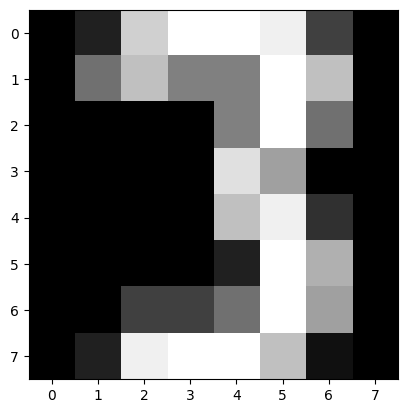

In [7]:
random_index = np.random.randint(0, X.shape[0])
plt.imshow(X[random_index].reshape(8,8), cmap='gray')
plt.show()

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [2]:
model = Perceptron(max_iter=1000, eta0=0.1, random_state=42)
# # Sample dataset (non-linear problem like XOR)
# X = [[0, 0], [1, 1], [1, 0], [0, 1]]
# y = [0, 0, 1, 1]  # XOR labels
# model.fit(X, y)

In [13]:
print(model.predict([[1, 0], [0, 1]]))

[0 0]


In [14]:

# Train the model
model.fit(X_train, y_train)

Perceptron(eta0=0.1, random_state=42)

In [16]:
len(model.coef_)

10

In [11]:
y_pred = model.predict(X_test)

In [12]:
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 95.00%


In [16]:
def step(z):
    return 1 if z >= 0 else 0 

In [23]:
def train_multiclass_perceptron(X, y, num_classes):
    num_features = X.shape[1]
    weights = np.zeros((num_classes, num_features))
    biases = np.zeros(num_classes)
    learning_rate = 0.01
    epochs = 100

    for _ in range(epochs):
        for i in range(len(X)):
            for class_idx in range(num_classes):
                target = 1 if y[i] == class_idx else 0
                weighted_sum = np.dot(X[i], weights[class_idx]) + biases[class_idx]
                prediction = step(weighted_sum)
                error = target - prediction
                weights[class_idx] += learning_rate * error * X[i]
                biases[class_idx] += learning_rate * error

    return weights, biases


In [24]:
def predict_multiclass_perceptron(X, weights, biases):
    predictions = []
    for i in range(len(X)):
        scores = [np.dot(X[i], weights[class_idx]) + biases[class_idx] for class_idx in range(len(biases))]
        predictions.append(np.argmax(scores))  # Choose the class with the highest score
    return np.array(predictions)


In [25]:
num_classes = 10
weights, biases = train_multiclass_perceptron(X_train, y_train, num_classes)

# Predict
y_pred = predict_multiclass_perceptron(X_test, weights, biases)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 95.83%
